In [1]:
from pycolator import *

In [2]:
# generate random data set with balanced classes
n = 1000
p = 1000
df = pd.DataFrame([1] * p + [0] * n, columns = ['Label'])
df.loc[df.Label == 1, 'score'] = np.random.lognormal(3,1,p)
df.loc[df.Label == 0, 'score'] = np.random.lognormal(0,1,n)
df = calcQ(df, 'score', addXlQ = False)

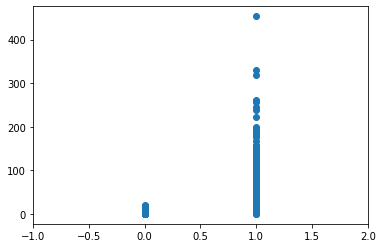

In [3]:
# distribution of the samples
plt.xlim(-1,2)
plt.scatter(df.Label,df.score)

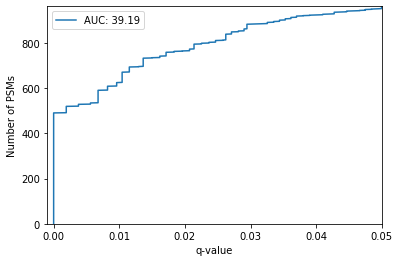

In [4]:
# pseudo ROC
pseudoROC(df, onlyFirstRank = False)
plt.savefig('../results/recallCurves/ROC_balanced.png')

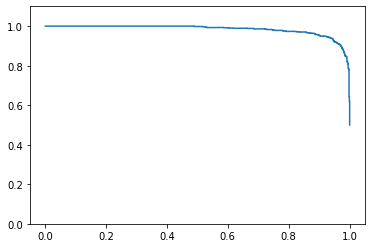

In [5]:
# PRC
PPV = 1 - df['FDR']
Recall = df['Label'].cumsum()/len(df.loc[df['Label'] == 1])
plt.ylim(0,1.1)
plt.plot(Recall, PPV)
plt.savefig('../results/recallCurves/PRC_balanced.png')

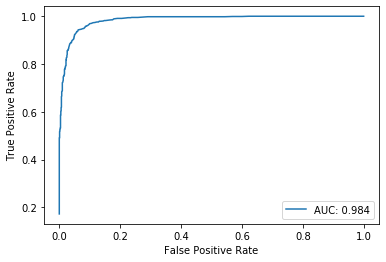

In [6]:
# ROC
steps = 1000
thresholds = np.linspace(50,0,steps)
FPR, TPR = [],[]
for t in thresholds:
    FPR.append(len(df.loc[(df.score >= t) & (df.Label == 0)]) / n)
    TPR.append(len(df.loc[(df.score >= t) & (df.Label == 1)]) / p)
AUC = auc(FPR,TPR)
plt.plot(FPR,TPR, label = 'AUC: ' + str(round(AUC,3)))
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('../results/recallCurves/ROC.png')

In [7]:
# now add imbalance: 10000 samples that have a lower score than any of the other data
numIrr = 1000
n += numIrr
dfIrr = pd.DataFrame([0] * numIrr, columns = ['Label'])
dfIrr.loc[:, 'score'] = 100 * (np.random.rand(numIrr) - 1)
dfIrr = calcQ(dfIrr,'score', addXlQ = False)
df = calcQ(pd.concat([df,dfIrr]), 'score', addXlQ = False)

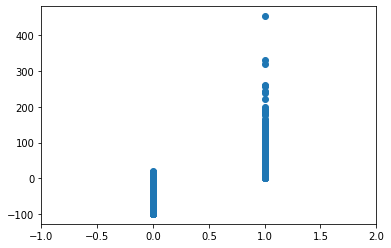

In [8]:
# new distribution of the samples
plt.xlim(-1,2)
plt.scatter(df.Label,df.score)

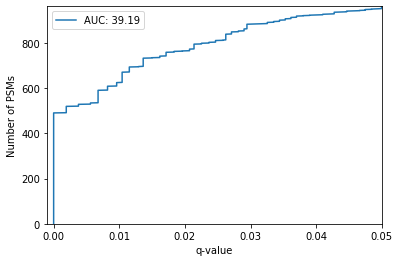

In [9]:
# pseudo ROC
pseudoROC(df, onlyFirstRank = False)
plt.savefig('../results/recallCurves/ROC_imbalanced.png')

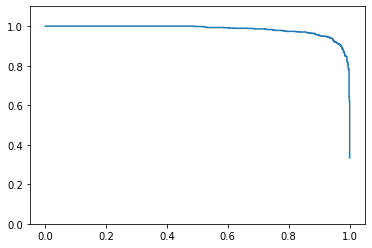

In [10]:
# PRC
PPV = 1 - df['FDR']
Recall = df['Label'].cumsum()/len(df.loc[df['Label'] == 1])
plt.ylim(0,1.1)
plt.plot(Recall, PPV)
plt.savefig('../results/recallCurves/PRC_imbalanced.png')

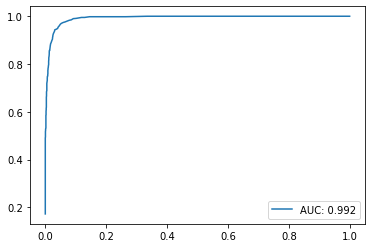

In [11]:
# ROC
steps = 1000
thresholds = np.linspace(50,-100,steps)
FPR, TPR = [],[]
for t in thresholds:
    FPR.append(len(df.loc[(df.score >= t) & (df.Label == 0)]) / n)
    TPR.append(len(df.loc[(df.score >= t) & (df.Label == 1)]) / p)
AUC = auc(FPR,TPR)
plt.xlim(-.05,1.05)
plt.plot(FPR,TPR, label = 'AUC: ' + str(round(AUC,4)))
plt.legend(loc = 'best')
#plt.savefig('../results/recallCurves/ROC.png')